In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os 
os.listdir()

['0D.csv',
 '0E.csv',
 '1D.csv',
 '1E.csv',
 '2D.csv',
 '2E.csv',
 '3D.csv',
 '3E.csv',
 '4D.csv',
 '4E.csv',
 'corr_matrix.csv',
 'descriptive_stats.csv',
 'example.pdf',
 'imv',
 'imv.ipynb',
 'pdf.py',
 'plots',
 'prmpt_pdf.py',
 'requirement.txt',
 'test.ipynb',
 'vibration_1_vs_2.png',
 'vibration_1_vs_3.png',
 'vibration_report.pdf',
 'vibration_report_realtime.pdf',
 'vibration_vs_rpm.png',
 'v_in_vs_measured_rpm.png']

In [3]:
for i in os.listdir():
    if '.csv' in i:
        data = pd.read_csv(i,nrows=50000)
        data.to_csv(i,index=False)
        # os.remove(i)

In [4]:
data = pd.read_csv('0D.csv')

In [5]:
data

,V_in,Measured_RPM,Vibration_1,Vibration_2,Vibration_3
0,0.0,28.610235,0.000000,0.000000,0.000000
1,0.0,28.610235,0.000000,0.000000,0.000000
2,0.0,28.610235,0.000000,0.000000,0.000000
3,0.0,28.610235,0.000000,0.000000,0.000000
4,0.0,28.610235,0.000000,0.000000,0.000000
...,...,...,...,...,...
49995,2.0,646.614470,0.022140,0.036149,0.028164
49996,2.0,646.614470,0.022507,0.036478,0.027906
49997,2.0,646.614470,0.021694,0.036142,0.028199
49998,2.0,646.614470,0.022024,0.036186,0.028182


In [27]:
# Drop the "Unnamed: 0" column if it exists
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]


In [57]:
data = data[data['Measured_RPM'] > 0]


In [58]:
# Define a reasonable range for RPM values
valid_min = 600
valid_max = 650

# Filter data within this range
data = data[(data['Measured_RPM'] >= valid_min) & (data['Measured_RPM'] <= valid_max)]


In [59]:
print(data['Measured_RPM'].describe())


count    266240.000000
mean        636.015375
std           9.725190
min         618.430820
25%         628.934150
50%         639.118910
75%         644.457970
max         649.997870
Name: Measured_RPM, dtype: float64


In [60]:
stats = data.describe()

In [61]:
data

,V_in,Measured_RPM,Vibration_1,Vibration_2,Vibration_3
12287,0.0,628.97701,1.237086,2.161033,1.496323
12288,2.0,628.97701,1.237866,2.160670,1.496519
12289,2.0,628.97701,1.237705,2.160413,1.496451
12290,2.0,628.97701,1.237924,2.160684,1.496072
12291,2.0,628.97701,1.237156,2.160023,1.495891
...,...,...,...,...,...
26423290,2.0,643.38338,0.001339,0.000769,0.003015
26423291,2.0,643.38338,0.001261,0.000952,0.003138
26423292,2.0,643.38338,0.000966,0.000895,0.003057
26423293,2.0,643.38338,0.000976,0.000744,0.002798


In [62]:
stats.to_csv('descriptive_stats.csv')

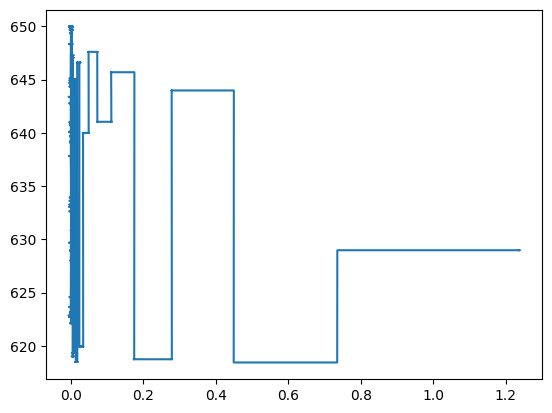

In [64]:
plt.plot(data['Vibration_1'],data['Measured_RPM'])

In [67]:
for col in ['Vibration_1', 'Vibration_2', 'Vibration_3']:
    plt.plot(data[col],data['Measured_RPM'], label=col)
plt.ylabel('Measured RPM')
plt.xlabel('Vibration Amplitude')
plt.title('Vibration Amplitude vs RPM')
plt.legend()
plt.grid()
plt.savefig("vibration_vs_rpm.png")
plt.close()

In [69]:
# Calculate correlation between two columns
correlation = data['Vibration_1'].corr(data['Vibration_2'])
print(f"Correlation between Vibration_1 and Vibration_2: {correlation}")


Correlation between Vibration_1 and Vibration_2: 0.9998800920119176


In [70]:
# Calculate the correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)


                  V_in  Measured_RPM  Vibration_1  Vibration_2  Vibration_3
V_in          1.000000      0.175497    -0.177266    -0.176976    -0.176776
Measured_RPM  0.175497      1.000000    -0.170248    -0.170384    -0.170878
Vibration_1  -0.177266     -0.170248     1.000000     0.999880     0.999977
Vibration_2  -0.176976     -0.170384     0.999880     1.000000     0.999932
Vibration_3  -0.176776     -0.170878     0.999977     0.999932     1.000000


In [71]:
correlation_matrix.to_csv('corr_matrix.csv')

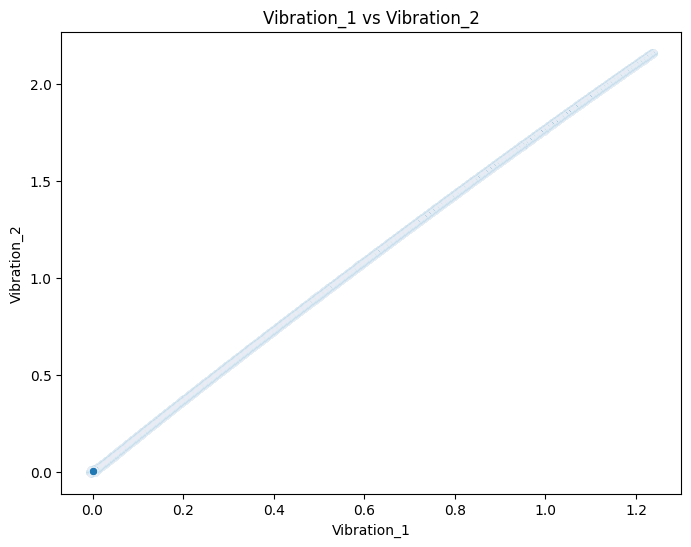

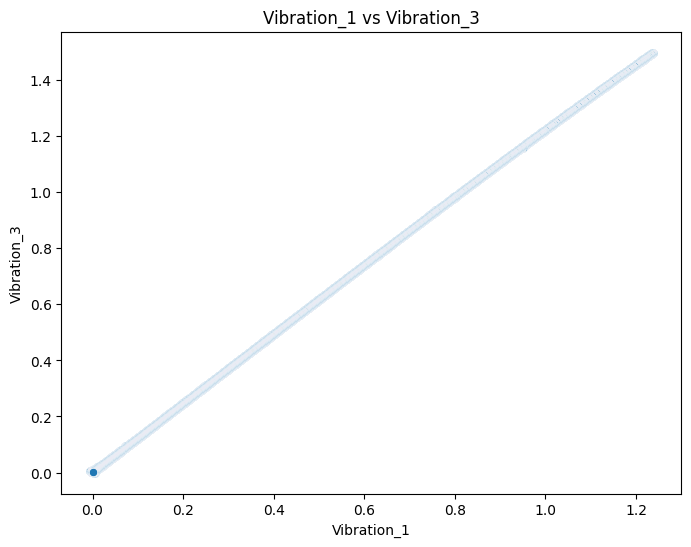

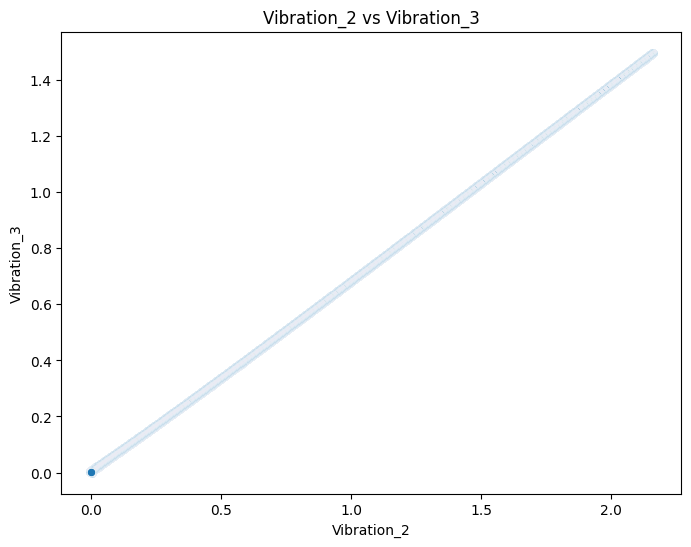

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded your DataFrame `data`

# Scatter plot between Vibration_1 vs Vibration_2
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Vibration_1'], y=data['Vibration_2'])
plt.title('Vibration_1 vs Vibration_2')
plt.xlabel('Vibration_1')
plt.ylabel('Vibration_2')
plt.show()

# Scatter plot between Vibration_1 vs Vibration_3
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Vibration_1'], y=data['Vibration_3'])
plt.title('Vibration_1 vs Vibration_3')
plt.xlabel('Vibration_1')
plt.ylabel('Vibration_3')
plt.show()

# Scatter plot between Vibration_2 vs Vibration_3
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Vibration_2'], y=data['Vibration_3'])
plt.title('Vibration_2 vs Vibration_3')
plt.xlabel('Vibration_2')
plt.ylabel('Vibration_3')
plt.show()


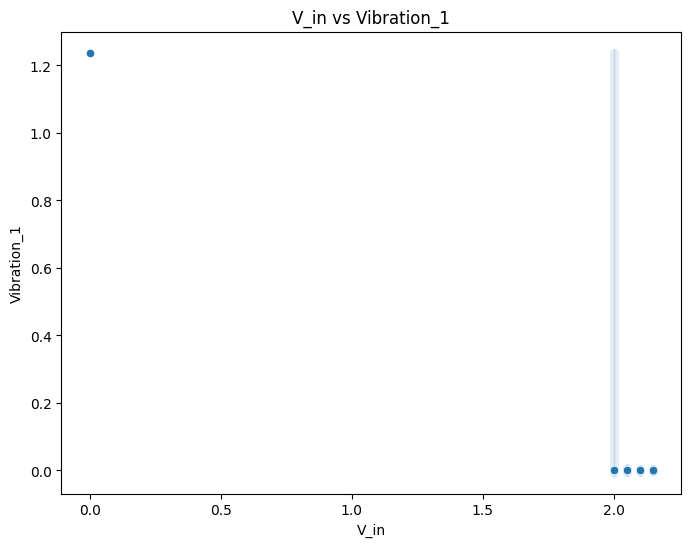

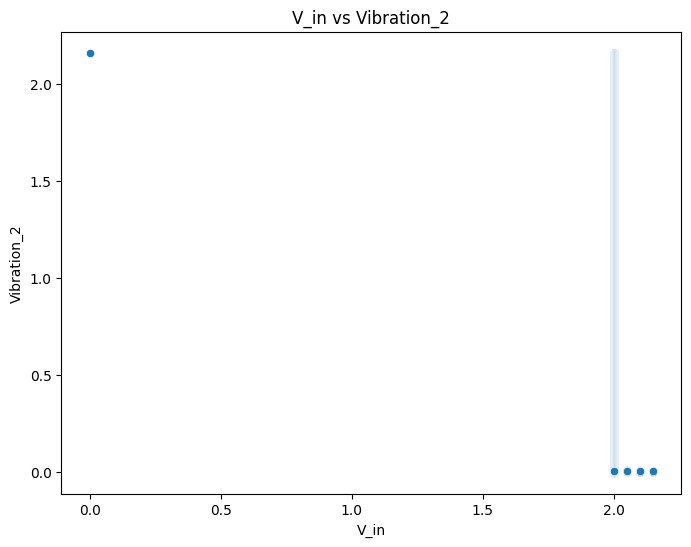

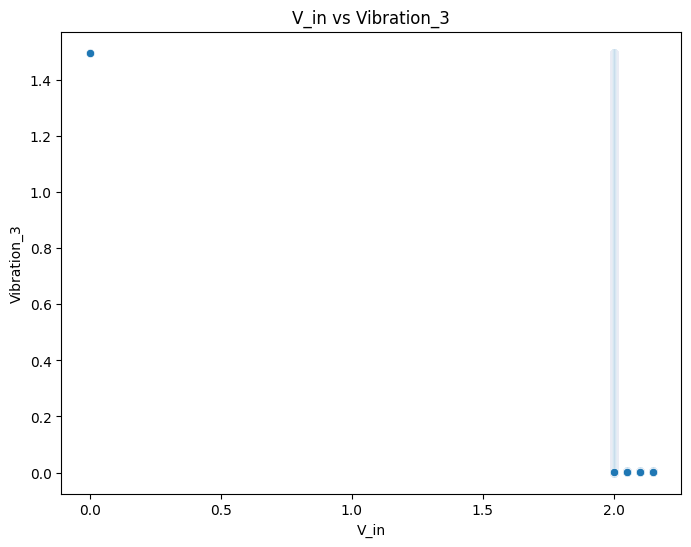

In [75]:
# Scatter plot between V_in vs Vibration_1
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['V_in'], y=data['Vibration_1'])
plt.title('V_in vs Vibration_1')
plt.xlabel('V_in')
plt.ylabel('Vibration_1')
plt.show()

# Scatter plot between V_in vs Vibration_2
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['V_in'], y=data['Vibration_2'])
plt.title('V_in vs Vibration_2')
plt.xlabel('V_in')
plt.ylabel('Vibration_2')
plt.show()

# Scatter plot between V_in vs Vibration_3
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['V_in'], y=data['Vibration_3'])
plt.title('V_in vs Vibration_3')
plt.xlabel('V_in')
plt.ylabel('Vibration_3')
plt.show()


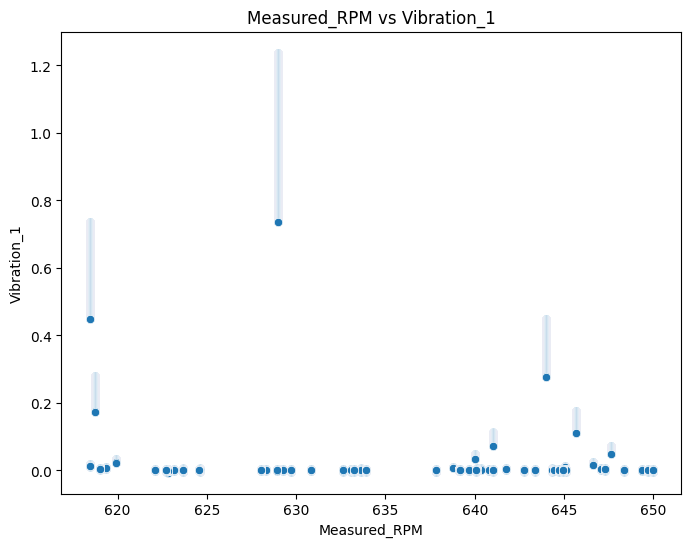

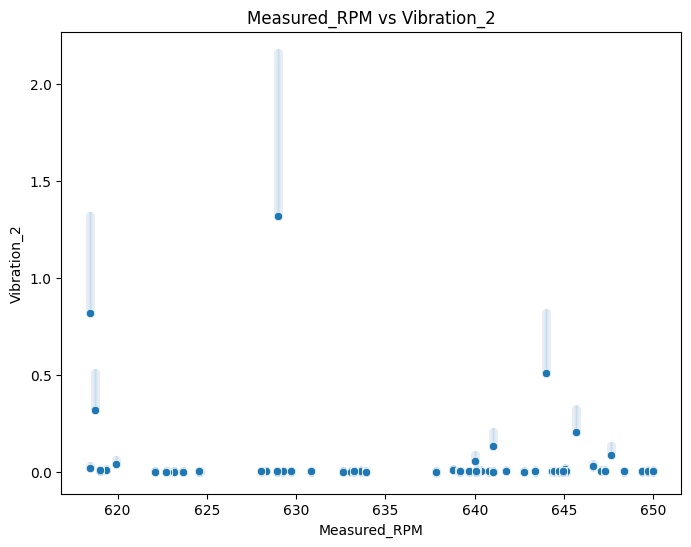

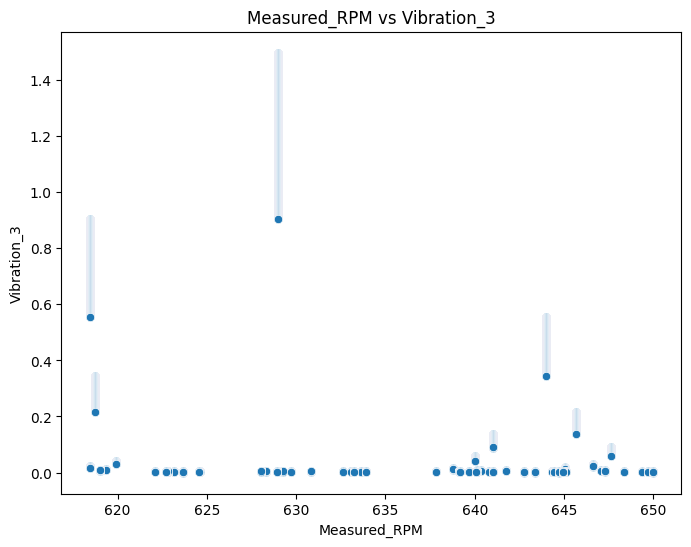

In [79]:
# Scatter plot between Measured_RPM vs Vibration_1
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Measured_RPM'], y=data['Vibration_1'])
plt.title('Measured_RPM vs Vibration_1')
plt.xlabel('Measured_RPM')
plt.ylabel('Vibration_1')
plt.show()

# Scatter plot between Measured_RPM vs Vibration_2
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Measured_RPM'], y=data['Vibration_2'])
plt.title('Measured_RPM vs Vibration_2')
plt.xlabel('Measured_RPM')
plt.ylabel('Vibration_2')
plt.show()

# Scatter plot between Measured_RPM vs Vibration_3
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Measured_RPM'], y=data['Vibration_3'])
plt.title('Measured_RPM vs Vibration_3')
plt.xlabel('Measured_RPM')
plt.ylabel('Vibration_3')
plt.show()


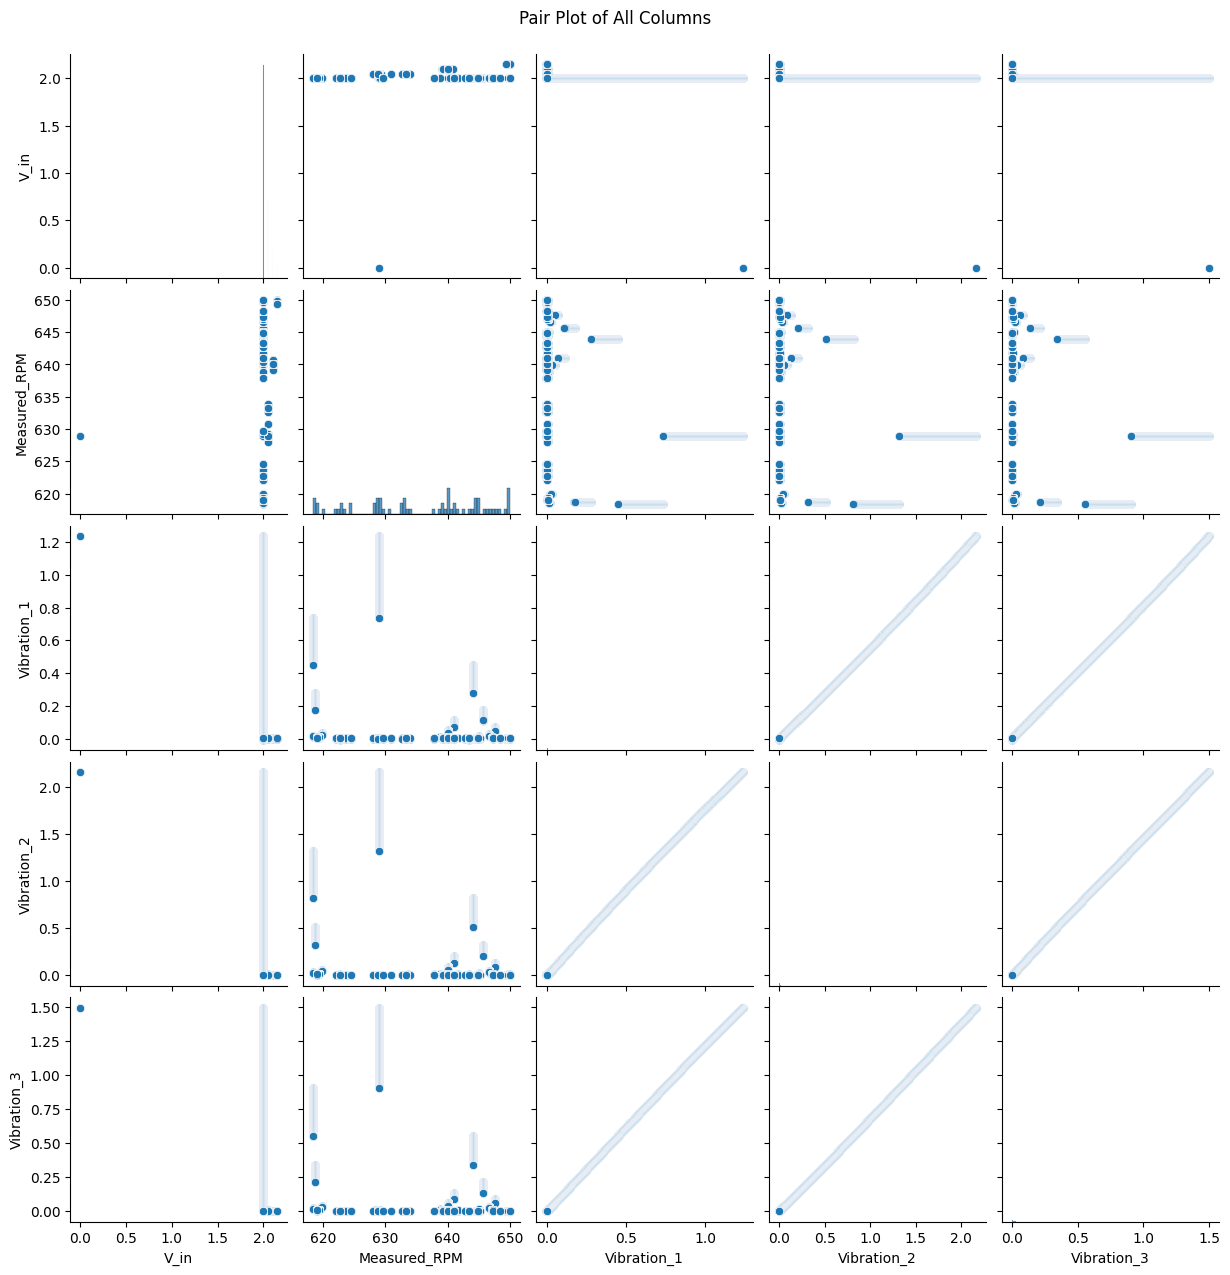

In [81]:
# Pair plot for all numerical columns in the dataset
sns.pairplot(data[['V_in', 'Measured_RPM', 'Vibration_1', 'Vibration_2', 'Vibration_3']])
plt.suptitle('Pair Plot of All Columns', y=1.02)
plt.show()


c:\Users\win10\OneDrive\Desktop\IMV-Corporation\imv\Lib\site-packages\fpdf\__init__.py:39: UserWarning: You have both PyFPDF & fpdf2 installed. Both packages cannot be installed at the same time as they share the same module namespace. To only keep fpdf2, run: pip uninstall --yes pypdf && pip install --upgrade fpdf2
  warnings.warn(
C:\Users\win10\AppData\Local\Temp\ipykernel_9856\2309687241.py:22: LangChainDeprecationWarning: The class `Ollama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaLLM``.
  llm = Ollama(model="llama3.2:1b-instruct-q4_K_S")


RuntimeError: asyncio.run() cannot be called from a running event loop